编码步骤
1. 导入MNIST数据集。
2. 分析MNIST样本特点定义变量。
3. 构建模型。
4. 训练模型并输出中间状态参数。
5. 测试模型。
6. 保存模型。
7. 读取模型。

# 导入数据集
利用TensorFlow代码下载MNIST

In [40]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


> 代码中的one_hot=True，表示将样本标签转化为one_hot编码。

- MNIST数据集汇总图片是28x28像素，所以，每一幅就是1行784列的数据，括号中的每一个值代表一个像素。
- 如果图片是黑白的，图片中黑色的地方数值为0，有图案的地方，数值为0~255之间的数字，代表其**颜色的深度**。
- 如果是彩色的图片，一个像素会由3个值来表示RGB。

In [41]:
print('输入数据：',mnist.train.images)
print('输入数据的shape:',mnist.train.images.shape)

输入数据： [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据的shape: (55000, 784)


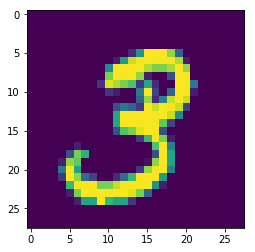

In [42]:
 # 显示第一张图片
import pylab
im = mnist.train.images[1]
im = im.reshape(28,28)
pylab.imshow(im)
pylab.show()

In [43]:
# MNIST里面包含3个数据集：第一个是训练数据集，另外两个是测试数据集和验证数据集。
print('输入数据集的shape：',mnist.test.images.shape)
print('验证数据集的shape：',mnist.test.images.shape)

输入数据集的shape： (10000, 784)
验证数据集的shape： (10000, 784)


# 分析图片特点
由于输入图片是550000x784的矩阵，所以先创建一个[None,784]的占位x和一个[None,10]的占位符y,然后使用feed机制将图片和标签输入进去。

In [55]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)
import pylab

# 重置图
tf.reset_default_graph()

# 定义占位符
x = tf.placeholder(tf.float32,[None,784]) # 数据集的维度是28x28=784
y = tf.placeholder(tf.float32,[None,10]) # 数字0~9，共有10个类别

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


> 代码中的None,表示张量的第一个维度可以是任何长度的。x代表能够输入任何数量的MNIST图像，每一张图展平成784的向量。

# 构建模型
## 定义学习参数
模型也需要权重值和偏执量，它们被统一叫做学习参数。在TensorFlow里，使用Variable来定义学习参数。

一个Variable代表一个可修改的张量，定义在TensorFlow的图中，其本身也是一种变量。使用Variable定义的学习参数可以用于计算输入值，也可以在计算中被修改。

In [56]:
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.zeros([10]))

> W的维度是[784,10],因为想要用784维的图片向量乘以它，以得到一个10维的证据值向量，每一位对应不同数字类。b的形状是[10],所以可以直接把它加到输出上面。

## 定义输出节点

In [57]:
pred = tf.nn.softmax(tf.matmul(x,W)+b) #SoftMax分类 

用tf.matmul(x,W)表示x乘以W，这里x是一个二维张量，拥有多个输入。然后再加上b,把他们的和输入到tf.nn.softmax函数里。

## 定义反向传播的结构

In [58]:
# 损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))

# 定义参数
learning_rate = 0.01

# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

1. 将生成的pred与样本标签y进行一次交叉熵的运算，然后取平均值。
2. 将这个结果作为一次正向传播的误差，通过梯度下降的优化方法找到能够使这个误差最小化的b和W的偏移量。
3. 更新b和W，使其调整为合适的参数。

整个过程就是不断地让损失值变小。因为损失值越小，才能表明输出的结果跟标签数据越相近。当cost小到我们的需求时，这时的b和W就是训练出来的合适值。

# 训练模型并输出中间状态参数
> batch_size参数代表的意义很关键，在深度学习中，都是讲数据按批次地向里面放的。

In [59]:
training_epochs = 25
batch_size = 100
display_step = 1

#启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 初始化参数
    
    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 循环所有数据集
        
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            # 运行优化器
            _,c = sess.run([optimizer,cost],feed_dict={x:batch_xs,y:batch_ys})
            
            # 计算平均loss值
            avg_cost += c / total_batch
            
        if (epoch + 1) % display_step == 0:
            print('Epoch:','%04d'% (epoch+1),'cost=','{:.9f}'.format(avg_cost))
    print("finished!")

Epoch: 0001 cost= 7.335221943
Epoch: 0002 cost= 3.792151731
Epoch: 0003 cost= 2.772239014
Epoch: 0004 cost= 2.258920695
Epoch: 0005 cost= 1.945905753
Epoch: 0006 cost= 1.734733546
Epoch: 0007 cost= 1.582136319
Epoch: 0008 cost= 1.466087271
Epoch: 0009 cost= 1.374811627
Epoch: 0010 cost= 1.300416312
Epoch: 0011 cost= 1.238649275
Epoch: 0012 cost= 1.186055967
Epoch: 0013 cost= 1.140930102
Epoch: 0014 cost= 1.101536189
Epoch: 0015 cost= 1.066803540
Epoch: 0016 cost= 1.035886222
Epoch: 0017 cost= 1.008233776
Epoch: 0018 cost= 0.983150143
Epoch: 0019 cost= 0.960485822
Epoch: 0020 cost= 0.939669464
Epoch: 0021 cost= 0.920529653
Epoch: 0022 cost= 0.902779490
Epoch: 0023 cost= 0.886409732
Epoch: 0024 cost= 0.871160451
Epoch: 0025 cost= 0.857006076
finished!


In [27]:
mnist.train.num_examples

55000

# 测试模型
先将计算测试的网络结构建立起来，然后通过最终节点的eval将测试值运算出来。

In [53]:
training_epochs = 25
batch_size = 100
display_step = 1

#启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 初始化参数
    
    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 循环所有数据集
        
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            # 运行优化器
            _,c = sess.run([optimizer,cost],feed_dict={x:batch_xs,y:batch_ys})
            
            # 计算平均loss值
            avg_cost += c / total_batch
            
        if (epoch + 1) % display_step == 0:
            print('Epoch:','%04d'% (epoch+1),'cost=','{:.9f}'.format(avg_cost))

    
    # 测试model
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

    print('Accuracy:',accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))



ValueError: Fetch argument <tf.Operation 'GradientDescent' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_1/ApplyGradientDescent"
 is not an element of this graph.)

> 并不是所有模型的测试错误率和训练时的最后一次损失值都很接近，这取决于训练样本和测试样本的分布情况，也取决于模型本身的拟合质量。
# 保存模型

首先要建立一个saver和一个路径，然后通过滴啊用save，自动将session中的参数保存起来。

In [60]:
training_epochs = 25
batch_size = 100
display_step = 1

# 创建saver
saver = tf.train.Saver()
model_path = "log/521model.ckpt"

#启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 初始化参数
    
    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 循环所有数据集
        
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            # 运行优化器
            _,c = sess.run([optimizer,cost],feed_dict={x:batch_xs,y:batch_ys})
            
            # 计算平均loss值
            avg_cost += c / total_batch
            
        if (epoch + 1) % display_step == 0:
            print('Epoch:','%04d'% (epoch+1),'cost=','{:.9f}'.format(avg_cost))

    
    # 测试model
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

    print('Accuracy:',accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))

    
    # 保存模型
    save_path = saver.save(sess,model_path)
    print("Model saved in file:%s" % save_path)

Epoch: 0001 cost= 9.195762495
Epoch: 0002 cost= 4.677690968
Epoch: 0003 cost= 3.154947034
Epoch: 0004 cost= 2.469959310
Epoch: 0005 cost= 2.084750342
Epoch: 0006 cost= 1.837843291
Epoch: 0007 cost= 1.664582884
Epoch: 0008 cost= 1.535432324
Epoch: 0009 cost= 1.435061674
Epoch: 0010 cost= 1.354502526
Epoch: 0011 cost= 1.287571579
Epoch: 0012 cost= 1.231363352
Epoch: 0013 cost= 1.182989852
Epoch: 0014 cost= 1.140837741
Epoch: 0015 cost= 1.103623537
Epoch: 0016 cost= 1.070715641
Epoch: 0017 cost= 1.040945756
Epoch: 0018 cost= 1.014077350
Epoch: 0019 cost= 0.989651274
Epoch: 0020 cost= 0.967348507
Epoch: 0021 cost= 0.946714054
Epoch: 0022 cost= 0.927750176
Epoch: 0023 cost= 0.910034403
Epoch: 0024 cost= 0.893677666
Epoch: 0025 cost= 0.878218451
Accuracy: 0.8365
Model saved in file:log/521model.ckpt


# 读取模型

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Starting 2nd session...
INFO:tensorflow:Restoring parameters from log/521model.ckpt
Accuracy: 0.0836
[3 9] [[1.4444648e-11 3.1308534e-08 1.2547371e-09 1.0000000e+00 9.6448110e-12
  3.0280473e-11 8.3190228e-09 1.6260230e-08 2.2978067e-11 1.3381984e-12]
 [8.5979581e-02 1.0824383e-02 1.8037374e-08 4.3016538e-08 1.5118922e-09
  5.0095891e-06 7.5961877e-09 5.7205878e-05 6.8581536e-11 9.0313375e-01]] [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


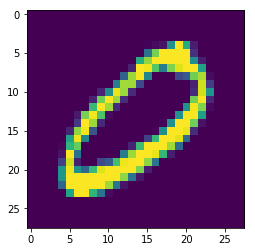

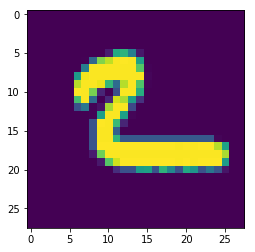

In [62]:
# -*- coding: utf-8 -*-

import tensorflow as tf #导入tensorflow库
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import pylab 

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data维度 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes

# Set model weights
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))

# 构建模型
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax分类

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

#读取模型
print("Starting 2nd session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    
     # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    output = tf.argmax(pred, 1)
    batch_xs, batch_ys = mnist.train.next_batch(2)
    outputval,predv = sess.run([output,pred], feed_dict={x: batch_xs})
    print(outputval,predv,batch_ys)

    im = batch_xs[0]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    

